In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
cancer =pd.read_csv("data.csv")

In [3]:
cancer = cancer.reset_index()

In [4]:
cancer

,index,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
cancer.columns

Index(['index', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

<AxesSubplot:>

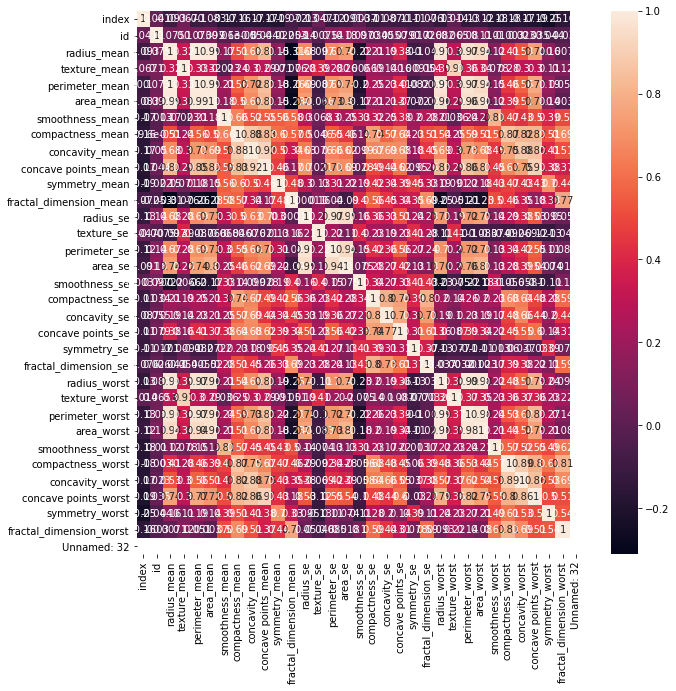

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(cancer.corr(),annot=True)

In [7]:
x=cancer.drop(['diagnosis','index','id','Unnamed: 32','compactness_se','smoothness_se','texture_se','texture_mean', 'smoothness_mean', 'smoothness_worst','symmetry_worst', 'fractal_dimension_worst', 'symmetry_mean','symmetry_se','fractal_dimension_mean','smoothness_se'],axis=1)
y=cancer['diagnosis']

In [8]:
x.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

In [9]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [10]:
x.shape

(569, 19)

In [11]:
y.shape

(569,)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)


In [13]:
x_train.shape,x_test.shape

((455, 19), (114, 19))

In [14]:
y_train.shape,y_test.shape

((455,), (114,))

In [15]:
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)

In [16]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

In [18]:
x_test.shape

(114, 19)

In [19]:
predict= knn.predict(x_test)

In [20]:
knn.score(x_test, y_test)

0.9385964912280702

In [21]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(x_train, y_train)

AdaBoostClassifier()

In [22]:
y_predict = AdaBoost.predict(x_test)
AdaBoost.score(x_test, y_test)

0.956140350877193

In [23]:
import pickle as pkl

pkl.dump(knn,open('model.pkl','wb'))


In [24]:
model1=pkl.load(open('model.pkl','rb'))